## Libaries

In [1]:
# Main libraries installation
!pip install geopandas requests contextily keplergl > nul

In [2]:
# Import necessary libraries
import geopandas as gpd        # Library for working with geospatial data
import pandas as pd            # Library for data manipulation and analysis
import os                      # Library for operating system-related functionality
import io                      # Library for input/output operations
import contextily as cx        # Library for basemaps and context tiles
import matplotlib.pyplot as plt  # Library for creating visualizations
from rasterio.crs import CRS   # Library for handling coordinate reference systems
import requests                # Library for making HTTP requests
from io import BytesIO         # Library for handling bytes input/output
import zipfile                 # Library for working with ZIP files
from keplergl import KeplerGl  # Library for creating interactive maps
from shapely.geometry import Polygon  # Library for working with geometric shapes
from IPython.display import Image  # Library for displaying images in IPython environment

## Data Ingestion

In [3]:
# Specify the GitHub URL for the ZIP file containing geo data for Comuna 14
github_url_c14 = 'https://github.com/oechenique/geo_data/raw/main/data/tejido_comuna14.zip'

# Download the ZIP file and extract the TIFF file
response_c14 = requests.get(github_url_c14)
zip_file_c14 = zipfile.ZipFile(BytesIO(response_c14.content))

# Display the list of files inside the ZIP archive
zip_file_c14.namelist()

['tejido_comuna14/',
 'tejido_comuna14/tejido_urbano_comuna14.cpg',
 'tejido_comuna14/tejido_urbano_comuna14.dbf',
 'tejido_comuna14/tejido_urbano_comuna14.prj',
 'tejido_comuna14/tejido_urbano_comuna14.qmd',
 'tejido_comuna14/tejido_urbano_comuna14.shp',
 'tejido_comuna14/tejido_urbano_comuna14.shx']

In [4]:
# List of files
files = [
    'tejido_comuna14/tejido_urbano_comuna14.shp',
    'tejido_comuna14/tejido_urbano_comuna14.cpg',
    'tejido_comuna14/tejido_urbano_comuna14.prj',
    'tejido_comuna14/tejido_urbano_comuna14.dbf',
    'tejido_comuna14/tejido_urbano_comuna14.qmd',
    'tejido_comuna14/tejido_urbano_comuna14.shx'
]

# Destination directory
destination_directory = 'data/3d/'

# Iterate over the files
for file in files:
    # Get the filename without the path
    filename = os.path.basename(file)

    # Build the destination filename
    destination_file = os.path.join(destination_directory, filename)

    # Extract the file
    with zip_file_c14.open(file) as zip_file:
        with open(destination_file, 'wb') as local_destination_file:
            local_destination_file.write(zip_file.read())

In [5]:
# Shapefile path
tejido_shapefile = "data/3d/tejido_urbano_comuna14.shp"  # Replace "nombre_del_shapefile" with the actual SHP file name.
# Read the shapefile into a GeoDataFrame
gdf_tejido = gpd.read_file(tejido_shapefile)

## Data exploring

In [6]:
# Display information about the GeoDataFrame
gdf_tejido

,id,smp,consolidad,altura,altos,origen,tipo,fuente,geometry
0,420781,23-090-025,1,28.0,0,FotogrametrÃ­a,Edificio,Sec Planeamiento,"POLYGON ((-58.43149 -34.57000, -58.43148 -34.5..."
1,421174,23-086A-020,0,5.6,0,FotogrametrÃ­a,Edificio,Sec Planeamiento,"POLYGON ((-58.43667 -34.56897, -58.43660 -34.5..."
2,422465,23-073-026,1,28.0,0,FotogrametrÃ­a,Edificio,Sec Planeamiento,"POLYGON ((-58.43192 -34.57259, -58.43189 -34.5..."
3,422799,23-071-008,1,2.8,0,FotogrametrÃ­a,Edificio,Sec Planeamiento,"POLYGON ((-58.43080 -34.57292, -58.43078 -34.5..."
4,422901,23-008-001,0,8.4,0,FotogrametrÃ­a,Edificio,Sec Planeamiento,"POLYGON ((-58.43357 -34.57402, -58.43357 -34.5..."
...,...,...,...,...,...,...,...,...,...
95929,414723,23-018-024,1,39.8,0,FotogrametrÃ­a,Edificio,Sec Planeamiento,"POLYGON ((-58.44208 -34.56959, -58.44210 -34.5..."
95930,415450,23-029-044C,1,27.2,0,FotogrametrÃ­a,Edificio,Sec Planeamiento,"POLYGON ((-58.44461 -34.56826, -58.44463 -34.5..."
95931,391758,21-075B-001,0,25.2,0,FotogrametrÃ­a,Edificio,Sec Planeamiento,"POLYGON ((-58.41271 -34.57769, -58.41270 -34.5..."
95932,416035,23-029-013E,0,11.2,0,FotogrametrÃ­a,Edificio,Sec Planeamiento,"POLYGON ((-58.44572 -34.56806, -58.44571 -34.5..."


In [7]:
# Coordinates of the intersection points
esquina_superior_izquierda = (-58.4282, -34.5886)
esquina_superior_derecha = (-58.4251, -34.5867)
esquina_inferior_izquierda = (-58.4248, -34.5908)
esquina_inferior_derecha = (-58.4221, -34.5890)

In [8]:
# Create a rectangular polygon with the coordinates
coordinates = [esquina_superior_izquierda, esquina_superior_derecha, 
               esquina_inferior_derecha, esquina_inferior_izquierda]
rectangle = Polygon(coordinates)


In [9]:
# Create a GeoDataFrame with the polygon
gdf_armenia = gpd.GeoDataFrame({'geometry': [rectangle]}, crs='EPSG:4326')

In [10]:
# Convert the coordinate reference system (CRS) of GeoDataFrames to EPSG:4326 (WGS 84)
gdf_tejido = gdf_tejido.to_crs(epsg=4326)
gdf_armenia = gdf_armenia.to_crs(epsg=4326)

In [11]:
# Perform a spatial intersection between the two GeoDataFrames
resultado_plaza = gpd.overlay(gdf_tejido, gdf_armenia, how='intersection')

<Axes: >

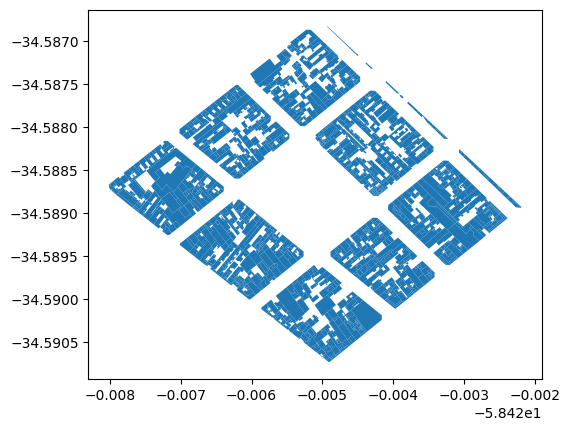

In [12]:
# Visualize the geometries
resultado_plaza.plot()

## Data Visualization

### KeplerGL library

In [ ]:
# Create a base map in KeplerGL
map = KeplerGl(height=600, width=800)

In [ ]:
# Add a GeoDataFrame to the map
map.add_data(data=resultado_plaza, name="plaza_armenia")

In [ ]:
# Visualize the map
map

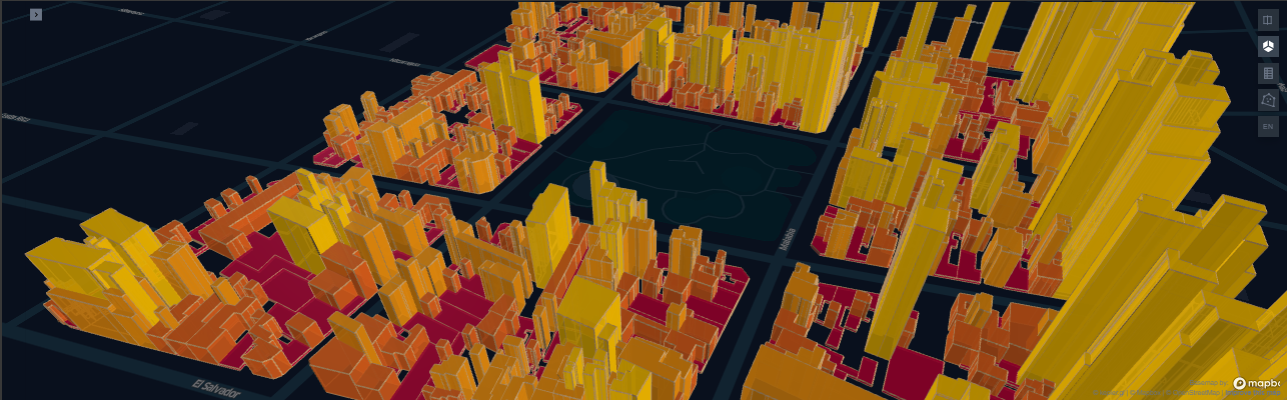

In [3]:
# Display the image in the notebook
Image(filename='data/3d/kepler.png')